# 10. Метрики за перформансот на моделите и техники на валидација  

(од Ѓорѓи Новески, Институт Јожеф Штефан, Словенија)  

Оценувањето на алгоритмите за машинско учење е суштински дел од секој проект. Во ова поглавје ќе ги опфатиме стандардните метрики и техники за евалуација на дадениот модел. Ќе почнеме со увоз на вообичаени ML пакети.  

In [1]:
import pandas
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score, roc_curve, auc, RocCurveDisplay
np.random.seed(41)

Во овој пример ќе разгледаме една заедничка база на податоци која е за типот на цвеќе на ирисот. Има информации за 3 типа цветови на ирис, ирис-сетоза, ирис-виргиница, ирис-версиколор. Има 4 карактеристики кои претставуваат димензии на делови од цветот.  

In [2]:
flower_dataset = pandas.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/10/iris.csv')
flower_dataset.drop('Id', axis=1, inplace=True)

In [3]:
flower_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Со цел да се обучи модел на машинско учење, податоците ги делиме во база на податоци за тренирање и тестирање. Целната променлива е колоната „Видови“, додека останатите 4 колони ќе бидат влез (обележја) во моделот.  

In [4]:
x = flower_dataset.iloc[:, :-1]
y = flower_dataset.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

## 10.1. Модел  

Моделот кој ќе го користиме за тренирање и предвидување на типовите на ирис ќе биде направен со алгоритмот наречен **машини со поддржувачки вектори (анг. support vector machines - SVM)**.  

In [5]:
model = SVC(random_state=42, probability=True)
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

### 10.1.1. Генерирање на матрица на конфузија  

Матрицата за конфузија е алатка која ни помага да видиме колку добро функционира моделот. Таа е дводимензионална, при што едната оска ја претставува предвидената класа, а другата оска ја претставува вистинската класа на податоците. Од матрицата можеме да увидиме многу работи и да ги изведеме следните метрики:  
- Вистински позитивни податоци (анг. true positive)  
- Лажно позитивни податоци (анг. false positive)  
- Вистински негативни податоци (анг. true negative)  
- Лажно негативни податоци (анг. false negative)  

Оваа метрика ни кажува дали еден податочен примерок е правилно или неправилно класифициран во позитивна или негативна класа соодветно. Подобро можеме да разбереме како оваа матрица функционира со визуелен приказ.  

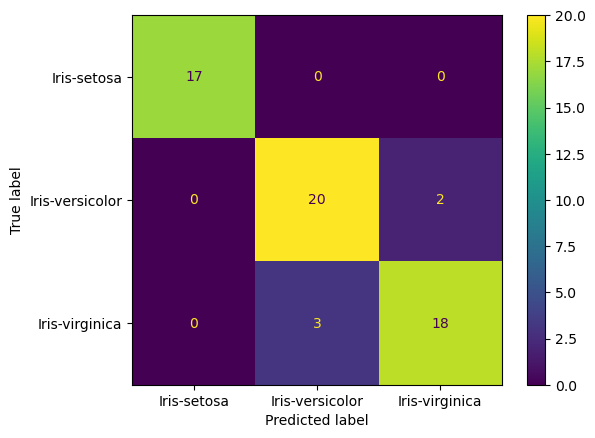

In [6]:
matrix = confusion_matrix(y_test, y_predicted)
display = ConfusionMatrixDisplay(matrix, display_labels=model.classes_)
display.plot()

## 10.2. Метрики  

Постојат многу различни метрики што може да се искористат за да се измери колку добро функционира еден моделот за класификација во машинско учење. На прв поглед тие може да дадат сличен или ист резултат, но во зависност од проблемот со кој се занимаваме и од податоците, некои метрики се посоодветни од другите. Во следните делови ќе објасниме и ќе покажеме различни метрики што може да се користат при мерење на перформансите на моделот за машинско учење.  
Важно е да се разберат разликите помеѓу метриките. Кога споменуваме „позитивен пример“ мислиме на набљудување на податоците што припаѓаат на целната класа што сакаме да ја предвидиме. На пример, ако имаме проблем со класификација на слики и треба да класифицираме дали сликата содржи мачка, тогаш оние слики што содржат мачка се нарекуваат „позитивни примери“, а оние што не содржат се нарекуваат „негативни примери“.  

## 10.3. Точност  

Метриката за **точност (анг. accuracy)** ги зема предвид сите предвидувања што ги направил моделот и го претставува процентот од предвидувањата што моделот ги направил правилно. Во однос на задачата за бинарна класификација, точноста е процентот од точните предвидувања **во однос на сите предвидувања**. Важно е да се разбере дека на пример во нашата ситуација, кога се занимаваме со базата на ирис, предвидувањето дека ирисот е од типот Iris-setosa додека всушност типот на ирисот е Iris-Virginica, има ефект врз оваа метрика.  

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_predicted)

In [ ]:
accuracy

0.9166666666666666

### 10.3.1. Тежинска точност  

Друг тип на метрика за точност е тежинската точност (анг. cost-sensitive accuracy).  

Има ситуации кога во нашата база на податоци имаме многу малку податоци од целната класа во споредба со друга класа. На пример, ако сакаме да класифицираме дали пациентот има рак или не, може да имаме база на податоци што се состои од само 100 примероци со пациенти кои имаат рак и 900 примероци без. Во овие ситуации, сакаме да му кажеме на алгоритмот дека е поважно да може да се одберат пациентите со рак и дека погрешната класификација на нив треба да има повисока "казна". Ова се прави со користење на тежинска точност. Ние им доделуваме тежини на нашите примероци на податоци, при што даваме поголеми тежини на примероците што ни се важни и сакаме да ги класифицираме.  

In [9]:
model = SVC(random_state=42, probability=True, class_weight='balanced')
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

Овде го обучуваме моделот користејќи тежинска точност преку обезбедување на дополнителен параметар „**class_weight**“. Вредноста „balanced“ (балансирано) автоматски на сите класи им доделува тежини кои се обратно пропорционални со честотата на секоја класа.  

## 10.4. Прецизност  

**Прецизноста (анг. precision)** како метрика зема предвид само една класа во исто време. Таа има за цел да открие колку од нашите предвидувања за одредена класа се всушност точни. Со други зборови, прецизноста е дел од точните предвидувања **меѓу позитивните <u>предвидувања</u>**.
Во нашето сценарио, не можеме да ја користиме прецизноста како метрика ако сакаме да кажеме колку добро функционирал моделот на сите класи од типот ирис, но може да користиме прецизност за да кажеме колку добро функционирал на секоја од трите класи поединечно.  

In [10]:
precision = precision_score(y_true=y_test, y_pred=y_predicted, average=None)

In [11]:
precision

array([1.        , 0.86956522, 0.9       ])

## 10.5. Опфатност  

Опфатноста (анг. recall), исто како и прецизноста, зема предвид само една класа во исто време. Опфатноста ја користиме кога сакаме да видиме колку добро нашиот модел ја открива целната класа. Таа го претставува процентот на точни предвидувања **меѓу позитивните <u>примери</u>**. Кога велиме позитивни примери, мислиме на целната класа за нашиот проблем.  

In [13]:
recall = recall_score(y_true=y_test, y_pred=y_predicted, average=None)
recall

array([1.        , 0.90909091, 0.85714286])

## 10.6. ROC крива  

**Кривата ROC (анг. reciever operating characteristic - оперативна карактеристика на приемникот)** го оценува квалитетот на класификаторот кога класификаторот прикажува веројатности. На пример, наместо класификаторот да дава строго 1 или 0 (далипримерокот припаѓа на целната класа или не), тој мора да предвиди одредена веројатност примерокот да припаѓа на целната класа. Обично опсегот или веројатноста оди од 0,0 (0% веројатност) до 1,0 (100% веројатност).  

Кога имаме веројатности, треба да дефинираме праг кој одредува од која веројатност нагоре сите предвидени примероци се класифицираат како целна класа. Со промена на оваа вредност на прагот, се менува и бројот на позитивни и негативни примери. Ако поставиме висок (строг) праг, на пример 0,9, ќе добиеме мал број на позитивни примери, но ќе бидеме посигурни дека тие се правилно предвидени. Исто така, ако поставиме низок (благ) праг, ќе бидеме посигурни дека правилно идентификувавме поголем број позитивни примероци, но и многу негативни примероци ќе бидат неправилно класифицирани.  

Кривата ROC ни помага да ја најдеме вредноста на прагот што ќе работи најдобро за нас.  

Бидејќи метриката ROC се занимава само со најмногу две класи (позитивна и негативна класа), ќе мора да отстраниме една од 3-те класи што ги имаме во нашата база на податоци за ирис. Ќе ги отстраниме примерите „Iris-setosa“ и сега ќе откриеме дали некој пример е од типот „Iris-versicolor“.  

In [14]:
two_class_dataset = flower_dataset[flower_dataset['Species'] != "Iris-setosa"].copy()
two_class_dataset['Species'] = np.where(two_class_dataset['Species'] == 'Iris-versicolor', 1, 0)

In [15]:
x = two_class_dataset.iloc[:, :-1]
y = two_class_dataset.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

Ги добиваме веројатностите за двете класи, но бидејќи нивниот збир е 1, можеме само да ја земеме целната класа за која сме заинтересирани.  

In [16]:
model.fit(x_train, y_train)
y_predicted = model.predict_proba(x_test)[:,1]

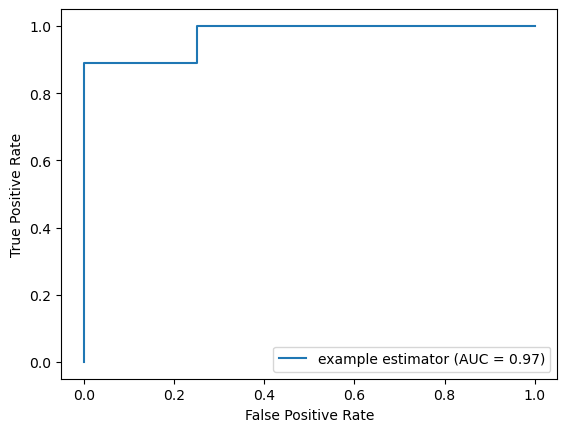

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

## 10.7. Вкрстена валидација  

Кога се имплементира машинско учење во реалниот свет, само тренирањето и тестирањето на еден класификатор на дадена база на податоци не се доволни за да се гарантира дека она што го гледаме од метриката е она што ќе го добиеме во реалноста. Постои шанса да ни се потрефила среќа кога сме ги делеле податоците на подмножества за тренирање и тестирање. За да бидеме посигурни во способноста на моделот да ракува со нови и претходно невидени податоци, можеме повеќекратно да ги тренираме и тестираме и да го избереме моделот кој најдобро функционира. Ова се нарекува **вкрстена валидација (анг. cross validation)**.  

Вкрстената валидација со k-повторувања (анг. k-folds) ја разложува базата на податоци на **k** помали подмножества, k-1 од нив за тренирање а останатото за валидација/проверка. Откако ќе се извршат обуката и валидацијата, ги зачувува резултатите од валидацијата и повторно го прави истото, но сега со различна распределба на подмножествата на податоци за тренирање и валидација. На овој начин, сите податоци ќе имаа шанса да бидат дел и од обуката и од проверката.

Кога ја делиме базата на податоци во база на податоци за тренирање и за валидација, мора да бидеме сигурни дека ќе оставиме дел од нашата оригинална база на податоци на страна за тестирање. Овие податоци за тестирање воопшто нема да бидат дел од циклусот на вкрстена валидација затоа што откако ќе избереме класификатор што го извршил најдоброто од k-повторувањата, сакаме да тестираме за да добиеме непристрасна проценка на перформансите на конечниот модел.  

In [18]:
scores = cross_val_score(model, x_train, y_train, cv=5)

In [20]:
print("%0.2f точност со стандардна девијација од %0.2f" % (scores.mean(), scores.std()))

0.93 точност со стандардна девијација од 0.08


За претходниот пример, избравме 5 повторувања. Што ќе се случи со резултатот ако го зголемиме бројот на повторувања?  

In [22]:
scores = cross_val_score(model, x_train, y_train, cv=11)

In [23]:
print("%0.2f точност со стандардна девијација од %0.2f" % (scores.mean(), scores.std()))

0.96 точност со стандардна девијација од 0.07
